In [3]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from chunkgfn.datasets.ccds import load_fasta_into_dict, get_tokenizer, count_instances

data_dir = "/home/jdv/code/chunk-gfn/data"  # os.getenv("CHUNKGFN_DATA")

records = load_fasta_into_dict(data_dir)
tokenizer = get_tokenizer(records, train=True)
token_counts = count_instances(records, tokenizer)

/tmp/ipykernel_127147/3189689439.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="center")
/tmp/ipykernel_127147/3189689439.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="center")


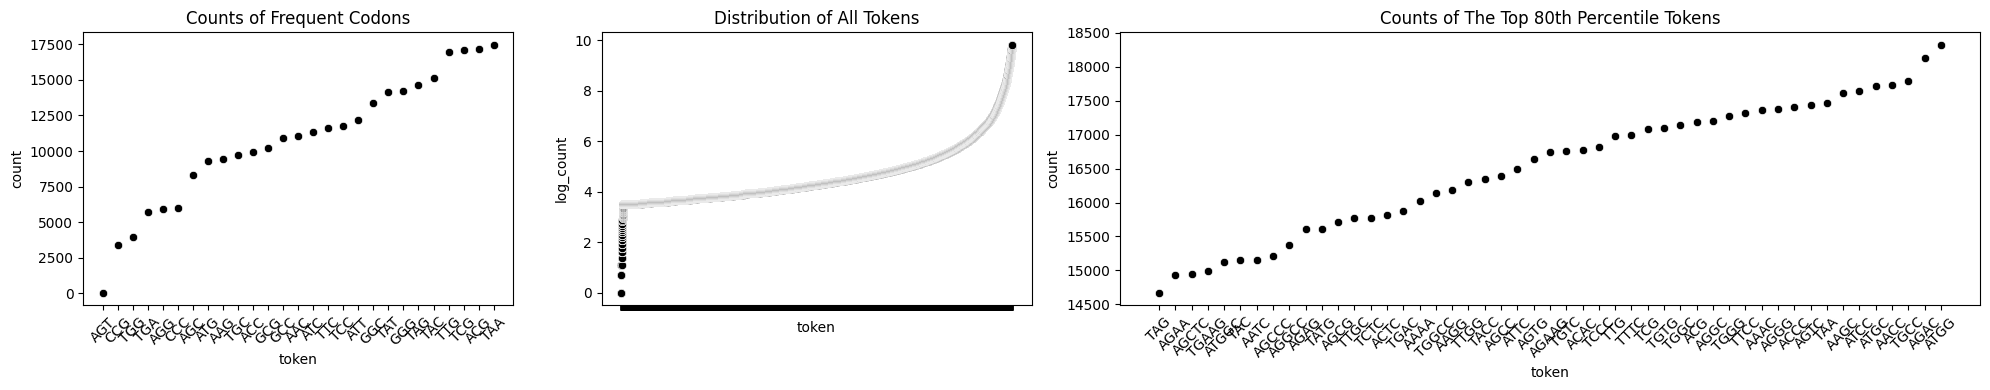

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4), width_ratios=[1, 1, 2])
axs = axs.ravel()

df = pd.DataFrame()
x, y = [], []
for label, counts in token_counts.items():
    x.append(label)
    y.append(counts)
df["token"] = x
df["count"] = y
df["log_count"] = np.log(y)

g = sns.scatterplot(data=df.loc[df["token"].str.len() == 3], x="token", y="count", ax=axs[0], color="black")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="center")
g.set_title("Counts of Frequent Codons")

g = sns.scatterplot(data=df, x="token", y="log_count", ax=axs[1], color="black")
g.set_xticklabels([])
g.set_title("Distribution of All Tokens")

g = sns.scatterplot(data=df.loc[df["count"] > df["count"].max() * 0.8], x="token", y="count", ax=axs[2], color="black")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="center")
g.set_title("Counts of The Top 80th Percentile Tokens")

fig.tight_layout()